<div style="color:#00BFFF">

# Nowcasting Consumer Expenditure: 

<div style="color:#00BFFF">

## Uncovering Reliable Proxies for Consumer Spending Behaviour. 

**1.1. Introduction: The Problem (Why)**

The current quarterly GDP reports lag in reflecting the dynamic changes in the economy, impacting decision-makers who rely on timely economic data. This project is devised to mitigate this issue by identifying high-frequency, readily updated data proxies that offer quicker insights into consumer expenditure patterns.

**1.2. Project Scope and Objectives (What)**

The project's primary objective is to systematically identify, harmonise, and validate high-frequency data sources as proxies for real-time tracking of consumer expenditure in the United States. The goal is to refine these proxies to provide more immediate data on consumer spending habits, thus bridging the gap caused by the delayed reporting of official GDP figures.

**Key Questions:**

- Which high-frequency data sources can serve as accurate proxies for consumer spending?
- How can we validate these proxies against established measures of consumer expenditure?
- What techniques can we employ to ensure these proxies offer immediate and reliable insights into current consumer spending trends?
- How will we address potential discrepancies between different data sources in terms of scale, units, or reporting standards?
- Are there any unforeseen challenges in harmonizing data frequencies (monthly vs. quarterly) that could impact the accuracy of our analysis?
- How can we ensure the economic relevance of our findings, beyond statistical correlations?
- What contingency plans do we have for dealing with data anomalies or irregularities that might skew our analysis?

**1.3. Methodology**

The methodology is designed to focus on data preparation and validation:

- **Exploratory Data Analysis (EDA)**: To understand the characteristics and quality of the high-frequency monthly indicators and their initial relationships to consumer spending.
- **Proxy Validation**: To establish a correlation with established measures of consumer spending through statistical analysis, ensuring that the proxies are reliable and relevant.

**1.4. Assumptions**

**Data Quality and Relevance:** We operate under the assumption that the high-frequency data from FRED and other sources accurately reflect current economic trends and consumer sentiments. However, there is an inherent risk of data bias or inaccuracy, which could impact the reliability of our findings.

**Predictive Power and Relevance:** While we aim to identify effective proxies for consumer expenditure, there's a risk that these proxies may not fully capture the complexities of consumer behaviour or may not adapt swiftly to sudden economic shifts.

**External Factors:** The project also assumes a stable economic environment. Sudden external shocks (like global events or policy changes) could significantly affect consumer behaviour, potentially reducing the predictive accuracy of our proxies.  


### 1. Consumption, Orders, and Inventories
- **Hypothesis 1A**: Increases in 'Real Personal Consumption Expenditures' are strongly correlated with 'PCE', reflecting direct consumer spending behavior.
- **Hypothesis 1B**: Higher 'Retail and Food Services Sales' indicate increased consumer activity, positively impacting 'PCE'.

### 2. Housing
- **Hypothesis 2A**: An uptick in 'Housing Starts' signals increased consumer confidence and spending, positively correlating with 'PCE'.
- **Hypothesis 2B**: Rising 'Home Sales' lead to increased consumption of related goods and services, thereby boosting 'PCE'.

### 3. Interest and Exchange Rates
- **Hypothesis 3A**: Lower 'Effective Federal Funds Rate' encourages borrowing and spending, positively influencing 'PCE'.
- **Hypothesis 3B**: A stronger domestic currency, reflected in favorable exchange rates, may correlate with increased import spending, impacting 'PCE'.

### 4. Labor Market
- **Hypothesis 4A**: Lower unemployment rates indicate a healthier labor market, leading to increased 'PCE'.
- **Hypothesis 4B**: Rising average wages suggest higher disposable income, positively affecting 'PCE'.

### 5. Money and Credit
- **Hypothesis 5A**: Increases in 'M1 and M2 Money Stock' indicate more liquidity in the economy, potentially boosting 'PCE'.
- **Hypothesis 5B**: Higher levels of consumer credit usage could correlate with increased 'PCE', reflecting consumer willingness to spend.

### 6. Output and Income
- **Hypothesis 6A**: 'Real Personal Income' growth is a strong predictor of increased 'PCE', as it reflects consumers' spending ability.
- **Hypothesis 6B**: A rise in GDP or other output measures suggests economic growth, likely paralleling increases in 'PCE'.

### 7. Prices
- **Hypothesis 7A**: Higher inflation rates, as measured by CPI or PPI, might initially boost 'PCE' but could suppress it if sustained.
- **Hypothesis 7B**: Stability in commodity prices may indicate steady consumer spending, impacting 'PCE'.

### 8. Stock Market
- **Hypothesis 8A**: Bullish stock market trends, reflected in rising indices, often correlate with increased consumer confidence and spending.
- **Hypothesis 8B**: Volatility in the stock market might negatively impact consumer spending due to uncertainty, affecting 'PCE'.

### Next Steps
1. **Data Mapping**: Map each hypothesis to specific indicators in your dataset.
2. **Statistical Analysis**: Perform correlation and regression analyses to test these hypotheses and identify the strength of the relationships.
3. **Proxy Selection**: Select the strongest proxies based on statistical significance and economic relevance for inclusion in the nowcasting model.

<div style="color:#00BFFF">

## Setup Environment and import libraries

In [1]:
# Run the imports file
%matplotlib inline

In [2]:
# ------- Standard Library Imports -------
import warnings
from datetime import datetime
from pprint import pprint
from typing import List

# ------- Third-Party Library Imports -------
import pandas as pd
from pandas import NaT
import numpy as np

# Utility and display modules
from IPython.display import display, HTML

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Remove warnings
warnings.filterwarnings('ignore')

# Set the display options
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)  

/var/folders/30/bhymp02j1fb47cmvs80_1b4m0000gn/T/ipykernel_61377/385094258.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


joined_dataset: This dataset includes various economic indicators with their quarterly rates of change. The first few rows indicate that there are a significant number of columns (124 in total), with the first column being 'PCE' which is our target variable. Some NaN values are present, likely in the first quarter of 2000, indicating missing data for that period.


defn: This dataset appears to be a mapping or definition file for the FRED indicators. It includes columns like 'id', 'tcode', 'ttype', 'fred', 'description', and others. This dataset will be useful for understanding the context and meaning of the indicators in the joined_dataset.

In [3]:
#load data generated from [1]M1_clean_and_preprocess.ipynb

#open bea_pce_original.csv
pce_df = pd.read_csv('./results/bea/bea_pce_original.csv',index_col=0)

#open defn
defn = pd.read_csv('./results/fred/fred_indicator_mappings.csv',index_col=0)

#open joined_dataset.csv
joined_dataset = pd.read_csv('./results/merged_data/joined_dataset_transformed.csv', index_col=0,parse_dates=False)

#open joined_dataset_rate_of_change.csv
joined_dataset_rate_of_change = pd.read_csv('./results/merged_data/joined_dataset_rate_of_change.csv', index_col=0,parse_dates=False)

In [4]:
joined_dataset.tail(10)

,PCE,Real Personal Income,Real personal income ex transfer receipts,Real personal consumption expenditures,Real Manu. and Trade Industries Sales,Retail and Food Services Sales,IP Index,IP: Final Products and Nonindustrial Supplies,IP: Final Products (Market Group),IP: Consumer Goods,IP: Durable Consumer Goods,IP: Nondurable Consumer Goods,IP: Business Equipment,IP: Materials,IP: Durable Materials,IP: Nondurable Materials,IP: Manufacturing (SIC),IP: Fuels,Capacity Utilization: Manufacturing,Help-Wanted Index for United States,Civilian Labor Force,Civilian Employment,Civilian Unemployment Rate,Average Duration of Unemployment (Weeks),Civilians Unemployed - Less Than 5 Weeks,Civilians Unemployed for 5-14 Weeks,Civilians Unemployed - 15 Weeks & Over,Civilians Unemployed for 15-26 Weeks,Civilians Unemployed for 27 Weeks and Over,Initial Claims,All Employees: Total nonfarm,All Employees: Goods-Producing Industries,All Employees: Mining and Logging: Mining,All Employees: Construction,All Employees: Manufacturing,All Employees: Durable goods,All Employees: Nondurable goods,All Employees: Service-Providing Industries,"All Employees: Trade, Transportation & Utilities",All Employees: Wholesale Trade,All Employees: Retail Trade,All Employees: Financial Activities,All Employees: Government,Avg Weekly Hours : Goods-Producing,Avg Weekly Overtime Hours : Manufacturing,Avg Weekly Hours : Manufacturing,Housing Starts: Total New Privately Owned,New Private Housing Permits (SAAR),New Orders for Consumer Goods,New Orders for Durable Goods,New Orders for Nondefense Capital Goods,Un lled Orders for Durable Goods,Total Business Inventories,Total Business: Inventories to Sales Ratio,M1 Money Stock,M2 Money Stock,Real M2 Money Stock,Total Reserves of Depository Institutions,Reserves Of Depository Institutions,Commercial and Industrial Loans,Real Estate Loans at All Commercial Banks,Total Nonrevolving Credit,Nonrevolving consumer credit to Personal Income,S&P s Common Stock Price Index: Composite,S&P s Common Stock Price Index: Industrials,S&P s Composite Common Stock: Dividend Yield,S&P s Composite Common Stock: Price-Earnings Ratio,E?ective Federal Funds Rate,3-Month AA Financial Commercial Paper Rate,3-Month Treasury Bill:,6-Month Treasury Bill:,1-Year Treasury Rate,5-Year Treasury Rate,10-Year Treasury Rate,Moody s Seasoned Aaa Corporate Bond Yield,Moody s Seasoned Baa Corporate Bond Yield,3-Month Commercial Paper Minus FEDFUNDS,3-Month Treasury C Minus FEDFUNDS,6-Month Treasury C Minus FEDFUNDS,1-Year Treasury C Minus FEDFUNDS,5-Year Treasury C Minus FEDFUNDS,10-Year Treasury C Minus FEDFUNDS,Moody s Aaa Corporate Bond Minus FEDFUNDS,Moody s Baa Corporate Bond Minus FEDFUNDS,Switzerland / U.S. Foreign Exchange Rate,Japan / U.S. Foreign Exchange Rate,U.S. / U.K. Foreign Exchange Rate,Canada / U.S. Foreign Exchange Rate,PPI: Finished Goods,PPI: Finished Consumer Goods,PPI: Intermediate Materials,PPI: Crude Materials,"Crude Oil, spliced WTI and Cushing",PPI: Metals and metal products:,CPI : All Items,CPI : Apparel,CPI : Transportation,CPI : Medical Care,CPI : Commodities,CPI : Durables,CPI : Services,CPI : All Items Less Food,CPI : All items less shelter,CPI : All items less medical care,Personal Cons. Expend.: Chain Index,Personal Cons. Exp: Durable goods,Personal Cons. Exp: Nondurable goods,Personal Cons. Exp: Services,Avg Hourly Earnings : Goods-Producing,Avg Hourly Earnings : Construction,Avg Hourly Earnings : Manufacturing,Consumer Sentiment Index,Consumer Motor Vehicle Loans Outstanding,Total Consumer Loans and Leases Outstanding,Securities in Bank Credit at All Commercial Banks
2021Q2,18.822412,-68.713567,6.200298,5.084202,-5.279547,3.905025,5.563608,1.813503,1.369679,1.256341,-4.738532,3.112906,-0.726307,10.149681,-1.332564,24.044372,4.481089,26.404354,1.1024,NaN,1.813126,2.467976,-0.2,2.4,-33.105186,55.458597,-16.848468,5.057710,-24.048287,-195.512701,4.028754,0.336176,4.784840,0.270362,0.195551,0.524315,-0.344531,4.627107,2.195850,3.918589,0

<div style="color:#FFA500">

### Correlation and Proxy Validation Analysis

</div>

Implemented after seasonality adjustments to ensure that the relationships being analysed and the proxies being identified are not influenced by seasonal fluctuations and confirm that identified relationships are economically plausible as well as statistically significant.

- **Technique**: Calculating Pearson or Spearman correlation coefficients to quantify the strength and direction of the relationship between different variables. Scatter plots will be used for a more nuanced view of these relationships.
- **Objective**: To identify which monthly indicators from the high-frequency dataset show a strong and statistically significant correlation with quarterly consumer spending figures. Economic theory will be applied to interpret these correlations, ensuring they align with established economic principles and behaviors.



In [5]:
#To be conducted

<div style="color:#5F9EA0">

##### Testing initial correlation with PCE 

</div>

Objective: To compare different economic indicators on a common scale.

In [6]:
import plotly.express as px
import plotly.graph_objects as go

# convert the index to datetime
joined_dataset.index = pd.to_datetime(joined_dataset.index)

# Calculating the correlation matrix, focusing on the correlation of each indicator with 'PCE'
correlation_matrix = joined_dataset.corr()

# Extracting the correlations with 'PCE'
pce_correlations = correlation_matrix['PCE'].sort_values(ascending=False)

top_bottom_20 = pd.concat([pce_correlations[:20],pce_correlations[-20:].sort_values(ascending=True)])


In [7]:

print('top 20 positive correlations:')
print(f'{pce_correlations[:20]}')


top 20 positive correlations:
PCE                                                 1.000000
All Employees: Service-Providing Industries         0.863489
All Employees: Total nonfarm                        0.851152
Civilian Employment                                 0.832924
All Employees: Trade, Transportation & Utilities    0.814460
All Employees: Retail Trade                         0.809967
All Employees: Government                           0.703312
All Employees: Wholesale Trade                      0.664346
IP Index                                            0.614892
All Employees: Nondurable goods                     0.614362
IP: Materials                                       0.599652
IP: Manufacturing (SIC)                             0.595861
IP: Final Products and Nonindustrial Supplies       0.583242
All Employees: Manufacturing                        0.582663
All Employees: Goods-Producing Industries           0.575177
IP: Durable Materials                               0.5

In [8]:


print('top 20 negative correlations:')
print(f'{pce_correlations[-20:].sort_values(ascending=True)}')



top 20 negative correlations:
Civilians Unemployed for 5-14 Weeks                  -0.816624
M2 Money Stock                                       -0.701125
Real M2 Money Stock                                  -0.585337
Civilian Unemployment Rate                           -0.499142
Initial Claims                                       -0.476973
Commercial and Industrial Loans                      -0.468935
Crude Oil, spliced WTI and Cushing                   -0.289446
Real Personal Income                                 -0.190403
Civilians Unemployed for 15-26 Weeks                 -0.181655
Civilians Unemployed - Less Than 5 Weeks             -0.156604
Total Business: Inventories to Sales Ratio           -0.150814
Total Reserves of Depository Institutions            -0.149400
M1 Money Stock                                       -0.132288
Canada / U.S. Foreign Exchange Rate                  -0.125523
Civilians Unemployed - 15 Weeks & Over               -0.112922
Reserves Of Depository In

<div style="color:#FFA500">

### Exploratory Data Analysis (EDA)

</div>

Performed early in the project to get an overview of the data's characteristics. This step is crucial for identifying the most relevant variables for analysis, understanding the data's basic structure, and ensuring that hypotheses are grounded in both statistical findings and economic logic.

- **Technique**: Using statistical tools to summarise the data, visualising distributions with histograms, identifying correlations with scatter plots, and detecting patterns and outliers with box plots.
- **Objective**: To gain an initial understanding of data trends, outliers, and correlations and to identify any anomalies or irregularities that may influence further analysis. Hereafter we will incorporate economic theories to hypothesise potential relationships between variables.

In [9]:
selected_indicators = top_bottom_20.head(10).index

# Initialize a figure
fig = go.Figure()

# Add traces for each selected indicator
for indicator in selected_indicators:
    fig.add_trace(go.Scatter(x=joined_dataset_rate_of_change.index, y=joined_dataset_rate_of_change[indicator], mode='lines', name=indicator))

# Update layout
fig.update_layout(
    title='Trends of PCE and Selected Indicators Over Time',
    xaxis_title='Date',
    yaxis_title='Quarterly Change (%)',
    legend_title='Indicators'
    #template='plotly_dark' # Optional: Change to a different template as needed
)

# Show the figure
fig.show()

In [10]:
# Descriptive statistics for the joined_dataset
# joined_dataset[top_bottom_20.index].describe()

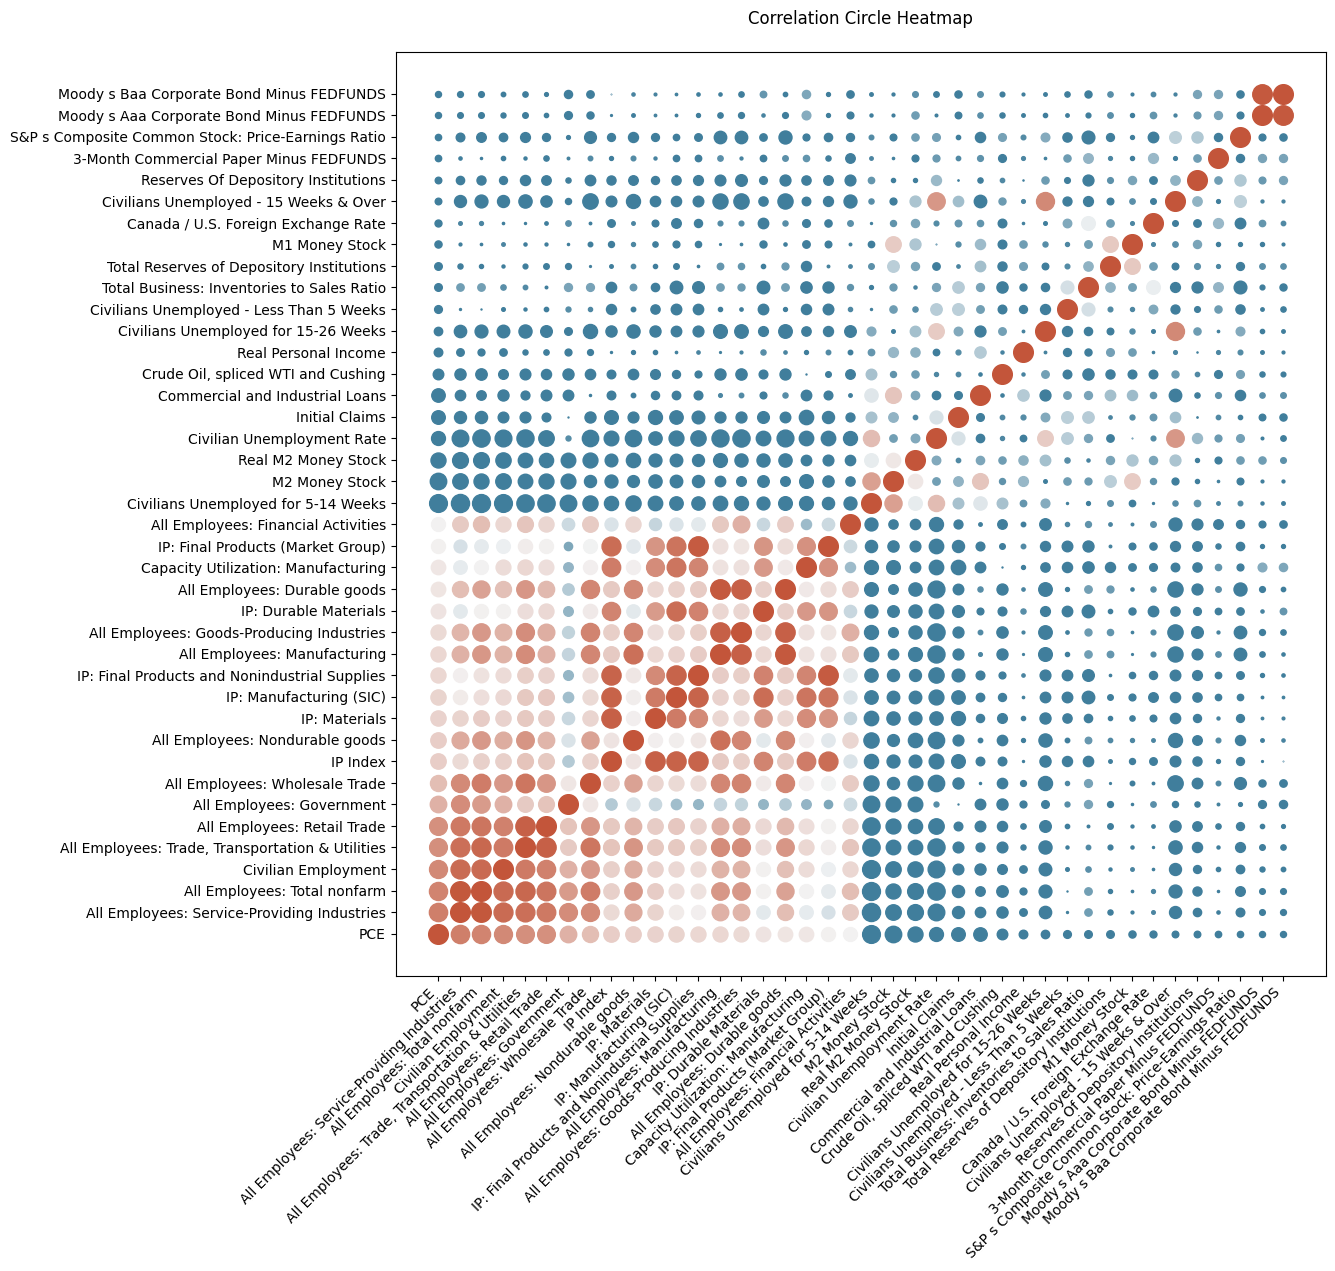

In [11]:
# Create heatmap of joined_dataset[top_bottom_10.index]
correlation_matrix = joined_dataset[top_bottom_20.index].corr()  # Using absolute values

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))

# Generate a colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Get the coordinates
x_coords, y_coords = np.meshgrid(correlation_matrix.columns, correlation_matrix.index)

# Get correlation values for size - scaled for visibility
sizes = np.abs(correlation_matrix.values.flatten()) * 200

# Get colors based on correlation values
colors = [cmap(val) for val in correlation_matrix.values.flatten()]

# Create the bubble heatmap
for (x, y), size, color in zip(np.c_[x_coords.ravel(), y_coords.ravel()], sizes, colors):
    ax.scatter(x, y, s=size, c=[color])

# Improve layout
ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.index)))
ax.set_xticklabels(correlation_matrix.columns)
ax.set_yticklabels(correlation_matrix.index)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
ax.set_title('Correlation Circle Heatmap', pad=20)

plt.show()


The correlation analysis of each indicator with 'PCE' (Private Consumption Expenditure) reveals interesting insights:

1. **High Positive Correlation**: Indicators like 'All Employees: Service-Providing Industries', 'All Employees: Total nonfarm', and 'All Employees: Retail Trade' show a high positive correlation with 'PCE'. This suggests that as these indicators increase, 'PCE' tends to increase as well, indicating a strong relationship.

2. **High Negative Correlation**: On the other end, indicators such as 'M2 Money Stock', 'Real M2 Money Stock', and especially 'Civilian Unemployment Rate' show a strong negative correlation with 'PCE'. This implies that as these indicators increase, 'PCE' tends to decrease, indicating an inverse relationship.

These correlations are crucial for identifying potential proxies for consumer spending. Indicators with high positive correlations could serve as good proxies for 'PCE', while those with high negative correlations might signal adverse economic conditions impacting consumer spending.

<div style="color:#FFA500">

### Comparative and Temporal Analysis

</div>

Undertaken after correlation analysis to delve deeper into the dynamics of the relationships between consumer spending and the identified proxies, providing insights into potential causative or predictive trends.

**Lead and Lag Analysis**:

- **Technique**: Analysing the time-shifted relationships between consumer spending and the proxies to identify if any indicators consistently lead or lag behind consumer spending patterns.
- **Objective**: To discover predictive relationships where certain proxies might signal changes in consumer spending ahead of time or respond with a delay. *While relevant, the Lead and Lag Analysis could become complex and time-consuming. We need to ensure that it directly contributes to the goal of identifying proxies.*

**Consumer Behaviour Indicators Correlation**:

- **Technique**: Using scatter plots and heatmaps to examine how different indicators relate to consumer spending visually.
- **Objective**: To explore more complex relationships between consumer spending and various high-frequency proxies and to identify patterns not evident in standard correlation analysis.



In [12]:
#To be conducted

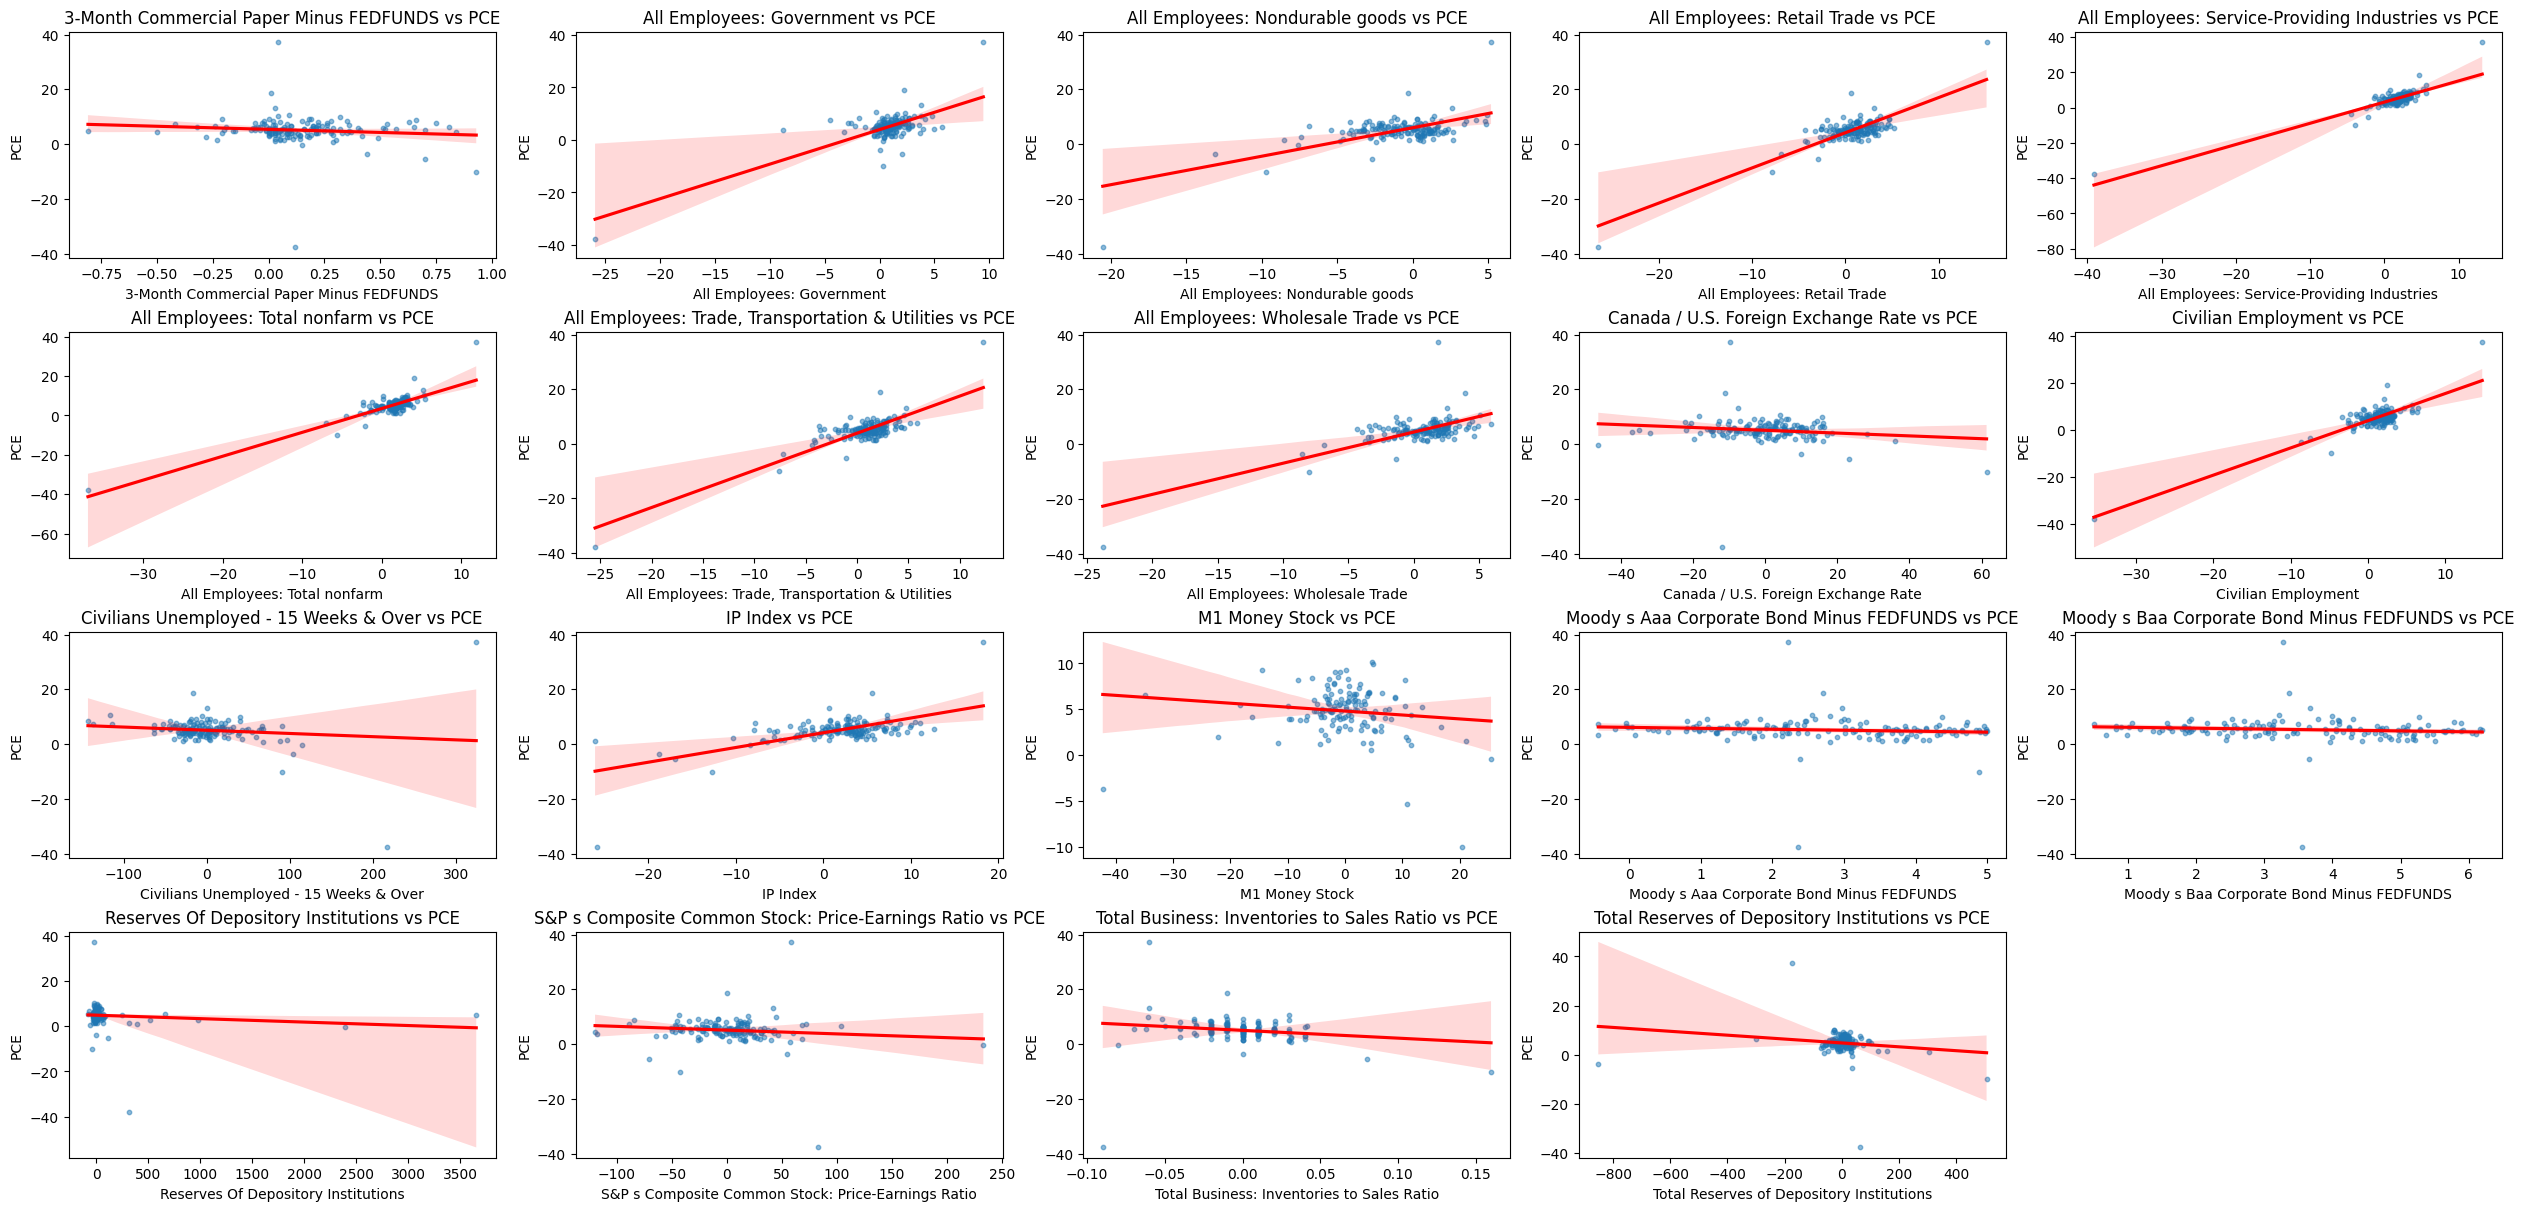

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming top_bottom_20 is a DataFrame that includes 'PCE' and the top/bottom indicators

# Separate positive and negative correlations
top_corr = top_bottom_20.head(10).index.drop('PCE')  # Top positively correlated
bottom_corr = top_bottom_20.tail(10).index  # Top negatively correlated

# Combine them for subplots
indicators = top_corr.union(bottom_corr)

# Determine the layout of the subplots
n_indicators = len(indicators)
ncols = 5  # Define the number of columns in your subplot grid
nrows = n_indicators // ncols + (n_indicators % ncols > 0)  # Calculate the required number of rows

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the indicators and create a regplot for each
for ax, indicator in zip(axes, indicators):
    sns.regplot(
        x=joined_dataset[indicator],
        y=joined_dataset['PCE'],
        ax=ax,
        line_kws={"color": "red"},  # Regression line color
        scatter_kws={"alpha": 0.5, "s": 10}  # Scatter plot point options
    )
    ax.set_title(f'{indicator} vs PCE')
    #ax.set_xlabel(indicator)
    ax.set_ylabel('PCE')

# Hide any unused subplots
for ax in axes[n_indicators:]:
    ax.set_visible(False)

# Show the plot
plt.show()


In [14]:
# Creating a mapping from indicator to group
indicator_to_group = dict(zip(defn['description'], defn['group']))

# Mapping each column in joined_dataset to its group
joined_dataset_groups = joined_dataset.rename(columns=indicator_to_group)

# Grouping by the new column names (groups) and calculating the mean for each group per quarter
grouped_dataset = joined_dataset_groups.groupby(joined_dataset_groups.columns, axis=1).mean()

# Including PCE in the grouped dataset for comparison
grouped_dataset['PCE'] = joined_dataset['PCE']

# # Displaying the first few rows of the grouped dataset
# grouped_dataset.head()


In [15]:
import plotly.graph_objs as go

# Assuming defn and joined_dataset are already defined
unique_groups = defn['group'].unique()

# Calculate percent change for the entire joined_dataset if not already
percent_change_dataset = joined_dataset_rate_of_change.copy()

# Plotting line charts for each group using Plotly
for group in unique_groups:
    # Filtering indicators belonging to the current group
    group_indicators = defn[defn['group'] == group]['description']

    # Ensure that the indicators are in the percent_change_dataset columns
    valid_indicators = [indicator for indicator in group_indicators if indicator in percent_change_dataset.columns]

    # If no valid indicators for this group, skip to the next group
    if not valid_indicators:
        continue

    # Filtering percent_change_dataset for valid indicators in the current group
    filtered_data = percent_change_dataset[valid_indicators]

    # Creating a Plotly figure
    fig = go.Figure()

    # Adding line traces for each indicator in the group
    for column in filtered_data.columns:
        fig.add_trace(go.Scatter(x=percent_change_dataset.index, y=filtered_data[column], mode='lines', name=column))
    
    # Adding PCE percent change for comparison
    fig.add_trace(go.Scatter(x=percent_change_dataset.index, y=percent_change_dataset['PCE'], mode='lines', name='PCE % Change', line=dict(color='black', width=2)))

    # Customizing the layout
    fig.update_layout(
        title=f'Group: {group} (Percent Change)',
        xaxis_title='Quarter',
        yaxis_title='Quarterly Percent Change',
        xaxis=dict(tickangle=45),
        legend_title_text='Indicator',
        plot_bgcolor='white',
        showlegend=True
    )

    # Adding grid lines
    fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')
    fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey')

    # Show plot
    fig.show()


### Temporal Analysis

1. **Seasonality and Trends**:
   - **Decomposition Analysis**: We can decompose the time series data for 'PCE' and key indicators to separately analyze their trends, seasonal patterns, and residuals.

2. **Time Lag Analysis**:
   - **Cross-Correlation**: Examine the cross-correlation function (CCF) between 'PCE' and other indicators to identify potential lead-lag relationships.

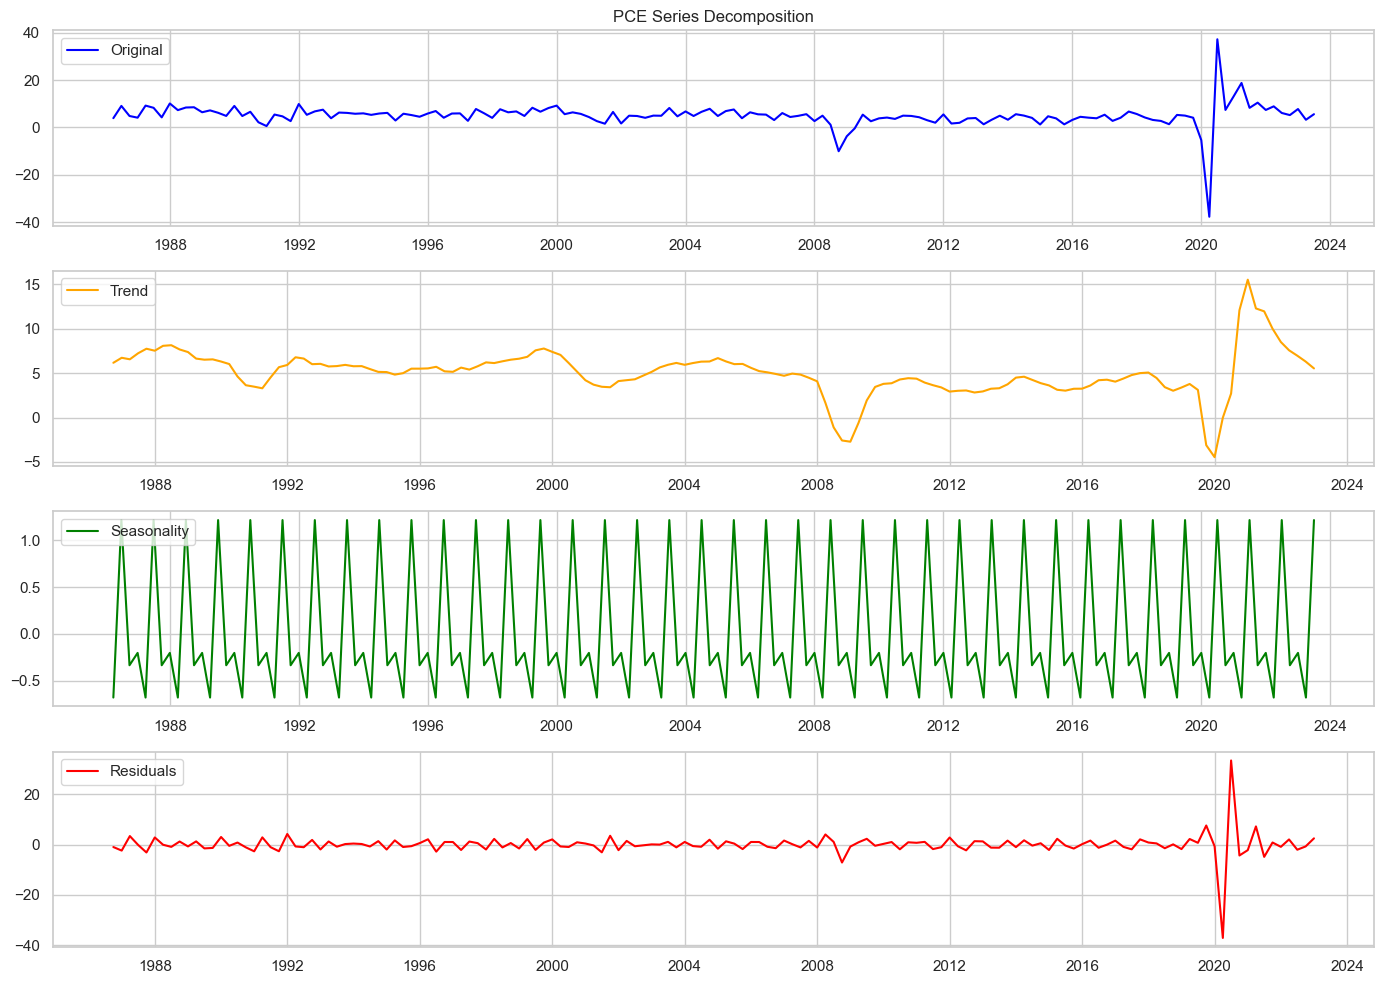

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting Seaborn style
sns.set(style="whitegrid")

# Selecting 'PCE' for decomposition analysis
pce_series = joined_dataset['PCE'].dropna()

# Decomposing the 'PCE' series
decomposition = seasonal_decompose(pce_series, model='additive', period=4)

# Plotting the decomposition with enhanced features
plt.figure(figsize=(14, 10))

# Original Series
plt.subplot(411)
plt.plot(pce_series, label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('PCE Series Decomposition')

# Trend
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')

# Seasonality
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')

# Residuals
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



The analyses provide two key insights into the 'PCE' (Private Consumption Expenditure) data:

### Decomposition Analysis
1. **Original Series**: Shows the actual 'PCE' data over time.
2. **Trend Component**: Highlights the long-term trend in 'PCE'. It helps to understand the underlying direction of consumer spending over time, outside of seasonal effects or irregular fluctuations.
3. **Seasonal Component**: This reveals any consistent seasonal patterns within 'PCE'. However, in this case, the seasonal fluctuations appear to be relatively subtle.
4. **Residual Component**: These are the irregularities or 'noise' remaining after extracting the trend and seasonal components. They might represent random fluctuations or non-systematic changes in 'PCE'.



<div style="color:#00BFFF">

## Stationarity Assessment


**Stationarity Assessment**: Using tests like the Augmented Dickey-Fuller ensures that our time series data is suitable for modelling and forecasting, as many statistical models require stationarity for valid results.

**Addressing Non-Stationarity**: Techniques such as differencing or transformation will be applied to achieve stationarity, which is crucial for the accuracy and reliability of our predictive models and correlation analysis. 

In [17]:
from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-Fuller test for stationarity
def adf_test(series, signif=0.05):
    # Remove NaNs
    series_cleaned = series.dropna()

    # Replace infinities with NaNs and then fill them
    series_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)
    # You can use interpolation or fill with mean/median etc.
    # For example, using forward fill:
    series_cleaned.fillna(method='ffill', inplace=True)

    # Now run the ADF test
    result = adfuller(series_cleaned, autolag='AIC')
    p_value = result[1]
    return p_value < signif

# Selecting 'PCE' and a few key indicators for the stationarity check
key_indicators_for_var = top_bottom_20.index.to_list()

# Checking stationarity
stationarity_results = {}
for indicator in key_indicators_for_var:
    stationarity_results[indicator] = adf_test(joined_dataset[indicator].dropna())


#print results that in stationarity_results dictionary if value if 'False'
for key, value in stationarity_results.items():
    if value == False:
        print(key, value)

print("##############################################")

for key, value in stationarity_results.items():
    if value == True:
        print(key, value)

##############################################
PCE True
All Employees: Service-Providing Industries True
All Employees: Total nonfarm True
Civilian Employment True
All Employees: Trade, Transportation & Utilities True
All Employees: Retail Trade True
All Employees: Government True
All Employees: Wholesale Trade True
IP Index True
All Employees: Nondurable goods True
IP: Materials True
IP: Manufacturing (SIC) True
IP: Final Products and Nonindustrial Supplies True
All Employees: Manufacturing True
All Employees: Goods-Producing Industries True
IP: Durable Materials True
All Employees: Durable goods True
Capacity Utilization: Manufacturing True
IP: Final Products (Market Group) True
All Employees: Financial Activities True
Civilians Unemployed for 5-14 Weeks True
M2 Money Stock True
Real M2 Money Stock True
Civilian Unemployment Rate True
Initial Claims True
Commercial and Industrial Loans True
Crude Oil, spliced WTI and Cushing True
Real Personal Income True
Civilians Unemployed for 15-

<div style="color:#00BFFF">

## Linear Regression Analysis to Determine Variable Influence on PCE

<div style="color:#5F9EA0">

##### Linear Regression Analysis

This section of the notebook conducts a linear regression analysis to explore how different variables in our dataset influence the Private Consumption Expenditure (PCE). The primary goal is to determine the strength of the linear relationship each variable has with PCE, quantified using the \( R^2 \) (coefficient of determination) metric.Variables with higher \( R^2 \) values are of particular interest as they may be key drivers of PCE variations.By understanding these relationships, we can better comprehend the dynamics influencing Private Consumption Expenditure, an essential component of economic analysis.

**Steps in the Analysis:**

1. **Data Preparation:**
   - We exclude 'PCE' from the list of independent variables as it is our dependent variable.
   - The dataset is cleaned to remove any rows with NaN or infinite values to ensure the validity of our regression analysis.

2. **Linear Regression:**
   - For each independent variable, we perform a simple linear regression against 'PCE'.
   - Only variables with a sufficient number of observations (set by `min_threshold`) are considered to ensure robust regression results.

3. **Calculation of \( R^2 \) Values:**
   - After fitting the model, we predict 'PCE' using each independent variable and compute the \( R^2 \) value.
   - The \( R^2 \) value indicates how much of the variance in 'PCE' is explained by the variable. A higher \( R^2 \) suggests a stronger explanatory power.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare the independent variables (excluding 'PCE')
independent_vars = joined_dataset.drop(columns=['PCE']).columns

# Prepare the dependent variable 'PCE'
dependent_var = joined_dataset['PCE']

# Setting a minimum threshold for the number of observations required for regression
min_threshold = 30

# Dictionary to store R^2 values for each variable
r2_values = {}

# Perform linear regression for each independent variable
for var in independent_vars:
    # Drop rows where either the independent or dependent variable is NaN or infinite
    combined_data = joined_dataset[[var, 'PCE']].replace([np.inf, -np.inf], np.nan).dropna()

    if len(combined_data) >= min_threshold:
        # Prepare the data for regression
        X = combined_data[var].values.reshape(-1, 1)
        y = combined_data['PCE'].values

        # Create and fit the model
        model = LinearRegression()
        model.fit(X, y)

        # Predict and calculate R^2
        predictions = model.predict(X)
        r2_values[var] = r2_score(y, predictions)

# Sorting the R^2 values
r2_values_sorted = dict(sorted(r2_values.items(), key=lambda item: item[1], reverse=True))

# Assuming 'defn' is a DataFrame as described
groups = defn.set_index('description')['group'].to_dict()

# Displaying the top few R^2 values for brevity
list(r2_values_sorted.items())[:10]

[('All Employees: Service-Providing Industries', 0.7456125934296224),
 ('All Employees: Total nonfarm', 0.7244604497588016),
 ('Civilian Employment', 0.6937615892233127),
 ('Civilians Unemployed for 5-14 Weeks', 0.6668741656021814),
 ('All Employees: Trade, Transportation & Utilities', 0.6633447180067247),
 ('All Employees: Retail Trade', 0.6560459710001507),
 ('All Employees: Government', 0.49464817909516545),
 ('M2 Money Stock', 0.4915768500588621),
 ('All Employees: Wholesale Trade', 0.4413557545487138),
 ('IP Index', 0.3780927359668894)]

<div style="color:#5F9EA0">

##### Grouping, Sorting and Displaying Results:


   - The \( R^2 \) values are sorted in descending order, and the top results are displayed.
   - This ranking helps us identify which variables have the most significant linear relationship with 'PCE'.

In [19]:

# Mapping the R^2 values to their respective groups
grouped_r2_values = {}
for var, r2 in r2_values.items():
    group = groups.get(var, 'Unknown')  # Default to 'Unknown' if no group is found
    if group not in grouped_r2_values:
        grouped_r2_values[group] = {}
    grouped_r2_values[group][var] = r2
    
#grouped_r2_values

In [20]:
# Create a sorted DataFrame for each group
group_dfs = []
for group, indicators in grouped_r2_values.items():
    # Create DataFrame and sort by R^2 values
    group_df = pd.DataFrame(list(indicators.items()), columns=['Economic Indicator', 'R^2'])
    group_df.sort_values(by='R^2', ascending=False, inplace=True)  # Sort by R^2 in descending order
    group_df.reset_index(drop=True, inplace=True)  # Reset index to maintain sorted order
    group_dfs.append(group_df)

# Concatenate all sorted group DataFrames horizontally
final_df = pd.concat(group_dfs, axis=1, keys=grouped_r2_values.keys())

# Display the resulting DataFrame
final_df.head(5)

Output and Income            \
                              Economic Indicator       R^2   
0                                       IP Index  0.378093   
1                                  IP: Materials  0.359583   
2                        IP: Manufacturing (SIC)  0.355050   
3  IP: Final Products and Nonindustrial Supplies  0.340171   
4                          IP: Durable Materials  0.296804   

      Consumption, Orders, and Inventories            \
                        Economic Indicator       R^2   
0               Total Business Inventories  0.230475   
1   Real personal consumption expenditures  0.144933   
2            New Orders for Consumer Goods  0.131765   
3             New Orders for Durable Goods  0.109798   
4  New Orders for Nondefense Capital Goods  0.067630   

                                       Labor Market            \
                                 Economic Indicator       R^2   
0       All Employees: Service-Providing Industries  0.745613   
1                      All Employees: Total nonfarm  0.724460   
2                               Civilian Employment  0.693762   
3               Civilians Unemployed for 5-14 Weeks  0.666874   
4  All Employees: Trade, Transportation & Utilities  0.663345   

                                     Housing            \
                          Economic Indicator       R^2   
0  Housing Starts: Total New Privately Owned  0.087755   
1         New Private Housing Permits (SAAR)  0.084377   
2                                        NaN       NaN   
3                                        NaN       NaN   
4                                        NaN       NaN   

                            Money and Credit            \
                          Economic Indicator       R^2   
0                             M2 Money Stock  0.491577   
1                        Real M2 Money Stock  0.342620   
2            Commercial and Industrial Loans  0.219900   
3  Total Reserves of Depository Institutions  0.022321   
4                             M1 Money Stock  0.017500   

                                         Stock Market            \
                                   Economic Indicator       R^2   
0           S&P s Common Stock Price Index: Composite  0.010340   
1  S&P s Composite Common Stock: Price-Earnings Ratio  0.010329   
2         S&P s Common Stock Price Index: Industrials  0.006569   
3        S&P s Composite Common Stock: Dividend Yield  0.005555   
4                                                 NaN       NaN   

                  Interest and Exchange Rates            \
                           Economic Indicator       R^2   
0  3-Month AA Financial Commercial Paper Rate  0.094249   
1                        5-Year Treasury Rate  0.067844   
2                       10-Year Treasury Rate  0.063874   
3                 E?ective Federal Funds Rate  0.058316   
4                      6-Month Treasury Bill:  0.044493   

                               Prices            
                   Economic Indicator       R^2  
0                      CPI : Services  0.196987  
1                       CPI : Apparel  0.190272  
2                      CPI : Durables  0.111177  
3  Crude Oil, spliced WTI and Cushing  0.083779  
4   Personal Cons. Exp: Durable goods  0.082535

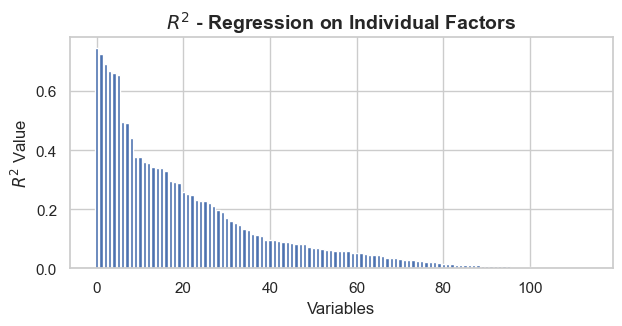

In [21]:
#Plotting the R^2 values
plt.figure(figsize=(7, 3))
plt.bar(range(len(r2_values_sorted)), list(r2_values_sorted.values()))
plt.title(r'$R^2$ - Regression on Individual Factors', fontsize=14, fontweight=600)
plt.xlabel('Variables')
plt.ylabel(r'$R^2$ Value')
plt.show()

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Determine the number of groups
num_groups = len(grouped_r2_values)

# Create subplots with shared y-axis
fig = make_subplots(rows=num_groups, cols=1, shared_yaxes=True, subplot_titles=list(grouped_r2_values.keys()))

# Plot each group in a separate subplot with sorted values
for i, (group, values) in enumerate(grouped_r2_values.items(), start=1):
    # Sort the values in descending order
    sorted_values = dict(sorted(values.items(), key=lambda item: item[1], reverse=True))

    fig.add_trace(
        go.Bar(x=list(sorted_values.keys()), y=list(sorted_values.values()), name=group),
        row=i, col=1
    )

# Update layout
fig.update_layout(
    height=800,  # Adjust the height depending on the number of subplots
    title_text=r'$R^2$ - Regression on Individual Factors by Group',
    showlegend=False
)

# Update y-axis label and hide x-axis tick labels
for i in range(1, num_groups + 1):
    fig.update_xaxes(title_text='', showticklabels=False, row=i, col=1)
fig.update_yaxes(title_text=r'R^2 Value', row=num_groups, col=1)

#update subplot y-axis range to all have value 0-1
# for i in range(1, num_groups + 1):
#     fig.update_yaxes(range=[0, 1], row=i, col=1)

# Show the figure
fig.show()


<div style="color:#FFA500">

### Proxy Evaluation and Variable Selection

</div>

Essential for finalising the selection of proxies, ensuring they are representative of consumer spending trends and robust under different conditions.

**Variable Selection and Reduction**:

- **Technique**: Selecting proxies based on correlation outcomes and economic rationale.
- **Objective**: To focus on a select group of high-frequency proxies that most accurately reflect and predict trends in consumer spending.



In [23]:
import plotly.graph_objects as go

# Consolidate all values into a single list with (group, variable, value) tuples
all_values = []
for group, values in grouped_r2_values.items():
    for variable, value in values.items():
        all_values.append((group, variable, value))

# Sort the values in descending order and select the top 10
top_10_values = sorted(all_values, key=lambda x: x[2], reverse=True)[:20]

# Prepare data for plotting
top_groups = [item[0] for item in top_10_values]
top_variables = [item[1] for item in top_10_values]
top_values = [item[2] for item in top_10_values]

# Create the bar chart
fig = go.Figure(data=go.Bar(
    x=top_variables,
    y=top_values,
    text=top_groups,
    marker_color='dodgerblue'  
))

# Update layout
fig.update_layout(
    title_text=r'$R^2$ Values - Top 10 Across All Groups',
    xaxis_title="Variables",
    yaxis_title=r'R^2 Value'
    #yaxis_range=[0, 1]  # Assuming R^2 values are between 0 and 1
)

# Show the figure
fig.show()


<div style="color:#FFA500">

### Regression Analysis and Uncertainty Assessment

</div>

Performed as a concluding analytical step to provide a more nuanced understanding of how each identified proxy affects consumer spending. This step helps quantify the relationships discovered in earlier analyses.

**Model Evaluation and Uncertainty Assessment**:

- **Technique**: Utilizing advanced statistical techniques, such as bootstrapping or Monte Carlo simulations, to evaluate the robustness of the selected proxies.
- **Objective**: To assess the reliability and stability of the chosen proxies under various economic scenarios and conditions. *Techniques like bootstrapping or Monte Carlo simulations might be more advanced than required for this project as the primary aim is to identify proxies rather than to build a predictive model.*


**Regression Analysis**

- **Technique**: Conduct linear regression analysis to quantify the impact of each selected proxy on consumer spending and assess the significance of regression coefficients.
- **Objective**: To determine the strength and nature of the influence that each proxy has on consumer spending, thereby providing a quantitative measure of their relative importance.

<div style="color:#FFA500">

### Modeling with VAR

In [24]:
from statsmodels.tsa.api import VAR

# Clean the data for VAR model
var_data = joined_dataset[key_indicators_for_var].dropna()

# Replace infinities with NaNs and then fill them
var_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Use an appropriate method to fill NaNs, e.g., forward fill
var_data.fillna(method='ffill', inplace=True)

# Fitting the VAR model and selecting the optimal lag order
model = VAR(var_data)

# Try reducing max_lags further
max_lags = min(5, len(var_data) // (len(key_indicators_for_var) * 2))

try:
    model_fit_revised = model.select_order(maxlags=max_lags)
    selected_lag_order_revised = model_fit_revised.aic

    # Output the selected lag order and fit the VAR model with this lag
    print(selected_lag_order_revised, model_fit_revised.summary())

    # Fitting the VAR model with the selected lag order
    var_model = model.fit(selected_lag_order_revised)

    # Displaying the results of the fitted VAR model
    var_model_results = var_model.summary()
    print(var_model_results)
except ValueError as e:
    print("Error encountered:", e)
    # Consider handling the error or adjusting the model parameters

model_fit_revised = model.select_order(maxlags=max_lags)
selected_lag_order_revised = model_fit_revised.aic

# Output the selected lag order and fit the VAR model with this lag
print(selected_lag_order_revised, model_fit_revised.summary())

# Fitting the VAR model with the selected lag order
var_model = model.fit(selected_lag_order_revised)

# Displaying the results of the fitted VAR model
var_model_results = var_model.summary()
print(var_model_results)


/Users/jnagtegaal/Desktop/M1 - Project/M1 - Git/NowCasting-M1/myenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



1  VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       40.31      41.25*   3.200e+17      40.69*
1      27.76*       66.48  3.932e+12*       43.48
-------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 30, Jan, 2024
Time:                     12:06:04
--------------------------------------------------------------------
No. of Equations:         40.0000    BIC:                    66.4774
Nobs:                     117.000    HQIC:                   43.4787
Log likelihood:          -6624.58    FPE:                3.93153e+12
AIC:                      27.7598    Det(Omega_mle):     2.37527e+07
--------------------------------------------------------------------
Results for equation PCE
                                                           coefficient       std. er